# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

### Understanding the structure of the data

In [2]:
df = pd.read_csv('foodhub_order.csv') # read the data
df.head() # returns the first 5 rows

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape # returns number of rows and columns

(1898, 9)

#### Observations:
1898 rows and 9 columns are present in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The following datatypes are represented in these columns:
- Integer: order_id, customer_id, food_preparation_time and delivery_time
- float64: cost_of_the_order
- object: restaurant_name, cuisine_type, day_of_the-week and rating

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df[["restaurant_name","day_of_the_week","cuisine_type"]] = df[["restaurant_name","day_of_the_week","cuisine_type"]].astype("category") 
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
Changing the datatypes from object to category reduced the memory usage from 133KB to 103KB by approximatly 23%.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations about Food Preparation Time

It takes between 20 and 35 minutes to prepare the food once an order is placed with an average time of 27 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].unique() #To make sure not rated is actually a value and not NaN

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
df[df['rating'] =="Not given"]['rating'].count() #How many lines with rating = Not given

736

#### Observations:
There are 736 orders without a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
df.isnull().sum() #Making sure the data is clean

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Functions to be used later

In [10]:
def check_it_out_object(tell_me_more): #For object or category variables
    print(tell_me_more.describe()) # describe variable
    print()
    print(tell_me_more.value_counts().describe()) #describe variable counts
    # print mode if 2 or less, otherwise ignore
    if tell_me_more.value_counts().mode().shape[0]>2: 
            print('mode : More than 2 modes')
    else:
            print('mode :',tell_me_more.value_counts().mode(0))
        
    print()
    
def check_it_out_cont(tell_me_more):  #For continous number variables
    print(tell_me_more.describe())  # describe variable
    print('skewedness',tell_me_more.skew()) # skew-factor
   
    # print mode if 2 or less, otherwise ignore
    if tell_me_more.mode().shape[0]>2:
            print('mode : More than 2 modes')
    else:
            print('mode :',tell_me_more.mode(0))
        
    print()
    

### 6a: customer id

In [11]:
print(df['customer_id'].value_counts().describe())
df['customer_id'].unique().shape[0]

count    1200.000000
mean        1.581667
std         1.090560
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: customer_id, dtype: float64


1200

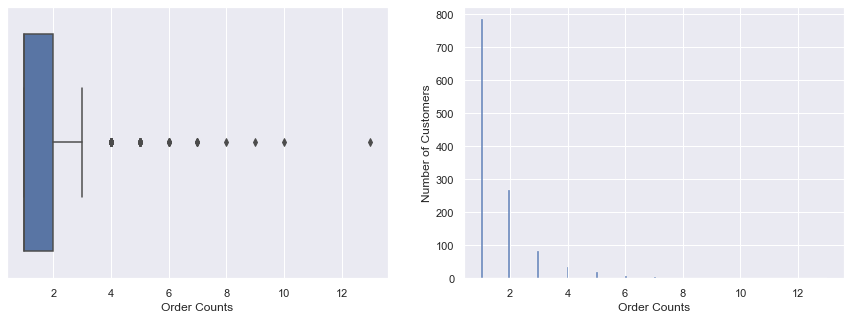

In [12]:
fig = plt.gcf()
fig.set_size_inches(15, 5) #size of plots

# left plot
plt.subplot(1,2,1);
plt.xlabel("Order Counts");
sns.boxplot(data = df, x =df['customer_id'].value_counts()).set(xlabel="Order Counts");

# right plot
plt.subplot(1,2,2); 
plt.xlabel("Order Counts");
plt.ylabel("Number of Customers");
sns.histplot(df['customer_id'].value_counts(),bins=178);

In [13]:
#How many customers placed how many orders
df_customer=df.copy() #create a copy of df
count_cust=df_customer['customer_id'].value_counts() #create series with custumors ids and how often they appear in df_customer
df_customer['customer_count']=count_cust.loc[df_customer['customer_id']].values # add column to df_customer with how often customer id appears
print("x orders per customer <> amount of customers with x orders")
df_customer.groupby(['customer_count'])['customer_id'].nunique() #number of customers per amount of orders

x orders per customer <> amount of customers with x orders


customer_count
1     784
2     267
3      83
4      33
5      19
6       6
7       4
8       1
9       1
10      1
13      1
Name: customer_id, dtype: int64

In [14]:
df_customer[df_customer['customer_count']>1].shape[0] #customers with more than one order

1114

### Observations about the Customer ID
- 1200 different customers placed between 1 and 13 orders out of the 1898 orders.
- The median number of orders per customers is 1, the mean order number is 1.5 and there are a some of outliers.
- Returning customers placed 1114 orders which is 58% of all orders.
- The 4 customers who placed the most orders, placed 8,9,10 and 13 respectively.

### 6b: restaurant_name

In [15]:
check_it_out_object(df['restaurant_name'])

count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: restaurant_name, dtype: float64
mode : 0    1
dtype: int64



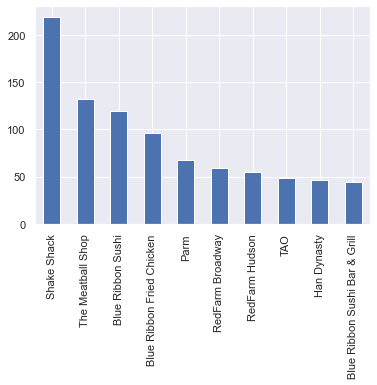

In [16]:
df['restaurant_name'].value_counts().head(10).plot.bar(); #Top 10 restaurants and the orders that were placed

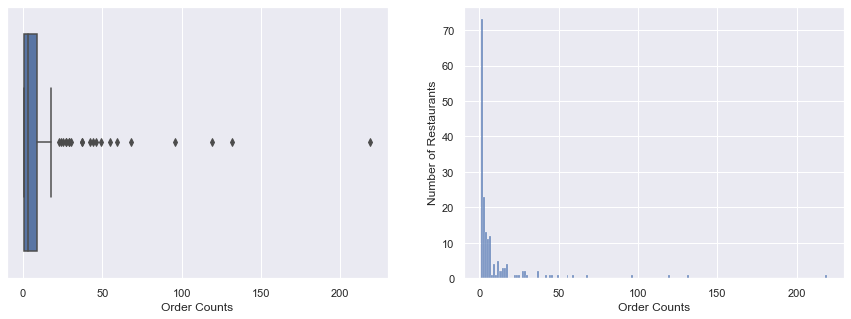

In [17]:
fig = plt.gcf() #plot size
fig.set_size_inches(15, 5)

#left plot
plt.subplot(1,2,1);
plt.xlabel("Order Counts");
sns.boxplot(data = df, x =df['restaurant_name'].value_counts()).set(xlabel="Order Counts");

#right plot
plt.subplot(1,2,2); 
plt.xlabel("Order Counts");
plt.ylabel("Number of Restaurants");
sns.histplot(df['restaurant_name'].value_counts(),bins=178);

In [18]:
df['restaurant_name'].value_counts().nlargest(10).sum() #amount of orders by top 10 restaurants

887

In [19]:
print(df['restaurant_name'].value_counts().nlargest(10).sum()) #orders of top 10 restaurants combined
df['restaurant_name'].value_counts().nlargest(10) #top 10 restaurants and the amount of orders

887


Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

### Observations about the Restaurant Name
- There are 178 different restaurants who have received between 1 and 219 orders out of 1898.
- The median number of orders per restaurant is 3, but the mean order number is 10.6. There are a lot of outliers.
- The 10 restaurants with the most orders (of which each has more than 44 orders, received 887 orders which is nearly 50% of all orders, with the top restaurant getting 218 (11.5%) orders.
- Half of the restaurants received 3 or less orders.

### 6c: cuisine_type

In [20]:
check_it_out_object(df['cuisine_type'])

count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object

count     14.000000
mean     135.571429
std      187.448748
min        7.000000
25%       17.250000
50%       47.500000
75%      180.500000
max      584.000000
Name: cuisine_type, dtype: float64
mode : More than 2 modes



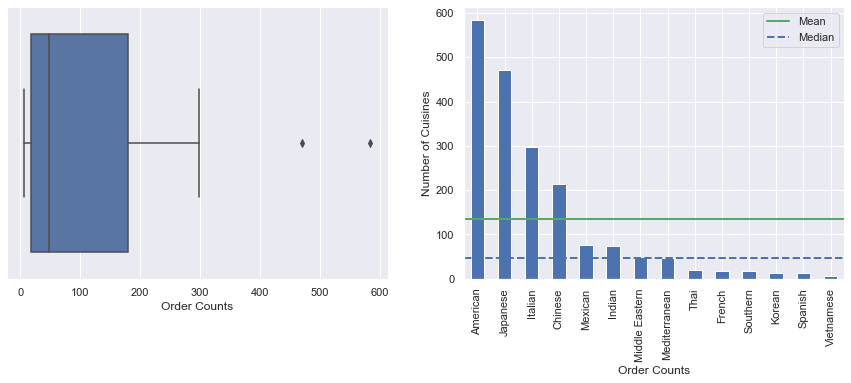

In [21]:
# Boxplot for order count per cuisine
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('test2png.png', dpi=200)
plt.subplot(1,2,1);
plt.xlabel("Order Counts");
sns.boxplot(data = df, x =df['cuisine_type'].value_counts()).set(xlabel="Order Counts");

#Barplot for order count per cuisine sorted max-min
plt.subplot(1,2,2); 
plt.xlabel("Order Counts");
plt.ylabel("Number of Cuisines");
plt.axhline(df['cuisine_type'].value_counts().mean(), color='g', linewidth=2,label="Mean");
plt.axhline(df['cuisine_type'].value_counts().median(), color='b', linestyle='dashed', linewidth=2,label="Median");
plt.legend()
df['cuisine_type'].value_counts().plot.bar();

In [22]:
print(df['cuisine_type'].value_counts().nlargest(3).sum()) #amount of orders by top 3 cuisines
df['cuisine_type'].value_counts().nlargest(3) #orders of top 10 restaurants

1352


American    584
Japanese    470
Italian     298
Name: cuisine_type, dtype: int64

### Observations about the Restaurant Name
- There are 14 different cuisine types which have received between 7 and 584 orders out of 1898.
- The most popular cuisine types are American (31%), Japanese (25%) and Italian (16%).
- The median order number is 17.3, but the mean amount of orders per cuisine type is 135.
- The 3 cuisines with the most orders (of which each has more than 298 orders), received 1352 orders which is 71% of all orders, with American cuisine getting 584 (31%) orders.

### 6d: cost_of_the_order

In [23]:
check_it_out_cont(df['cost_of_the_order'])

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
skewedness 0.6217469995871637
mode : 0    12.18
dtype: float64



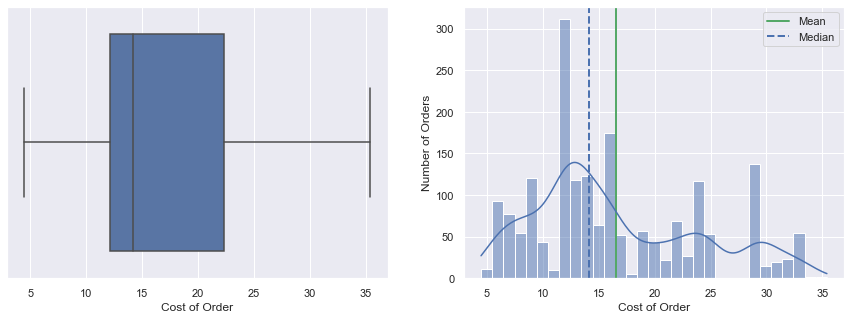

In [24]:
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.subplot(1,2,1);
plt.xlabel("Cost of Order");
sns.boxplot(data = df, x =df['cost_of_the_order']).set(xlabel="Cost of Order");

plt.subplot(1,2,2); 
plt.xlabel("Cost of Order");
plt.ylabel("Number of Orders");
plt.axvline(df['cost_of_the_order'].mean(), color='g', linewidth=2,label="Mean");
plt.axvline(df['cost_of_the_order'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
plt.legend()
sns.histplot(df['cost_of_the_order'],bins=31,kde="kde"); #abt. 1 bin per $


### Observations about the Cost of the Order
- The cost of the order ranges from \\$4.47 to \\$35.41 with an avarage order cost of \\$16.50.
- The distribution of the cost of the order is moderately right skewed (.6) with the median being \\$14.14.
- There is a gap in order costs between approximately \\$25 and \\$29. The reason for this isn't obvious from this data set.

### 6e: day_of_the_week

In [25]:
check_it_out_object(df['day_of_the_week'])

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object

count       2.000000
mean      949.000000
std       568.513852
min       547.000000
25%       748.000000
50%       949.000000
75%      1150.000000
max      1351.000000
Name: day_of_the_week, dtype: float64
mode : 0     547
1    1351
dtype: int64



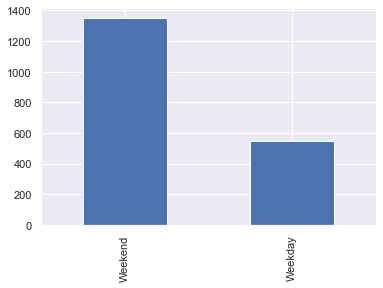

In [26]:
df['day_of_the_week'].value_counts().plot.bar();

### Observations about the Day of the Week
- Most orders were placed on the weekend (1351/71%) compared to 547/29% during the week.

### 6f: rating

In [27]:
df['rating'].value_counts()/1898

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

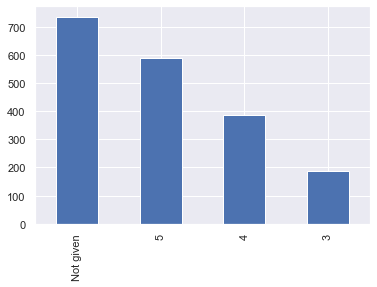

In [28]:
df['rating'].value_counts().plot.bar();

In [29]:
#changing ratings to numbers in df_add_ratings dataframe for avarage rating when a rating was given
df_add_ratings=df[df['rating']!="Not given"].copy() #removing data where no rating was given
df_add_ratings['rating']=df_add_ratings['rating'].astype(str).astype(int) #changing the ratings to integers
df_add_ratings['rating'].mean()

4.344234079173838

### Observations about the Rating

- Most orders weren't given a rating (39%), followed by the highest rating of 5 (31%), the middle ating of 4 (20%) and the lowest rating in our dataset of 3 (10%).
- The avarage rating when a rating was given is 4.34.

### 6g: food_preparation_time

In [30]:
check_it_out_cont(df['food_preparation_time'])

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
skewedness 0.03646881825816354
mode : 0    21
dtype: int64



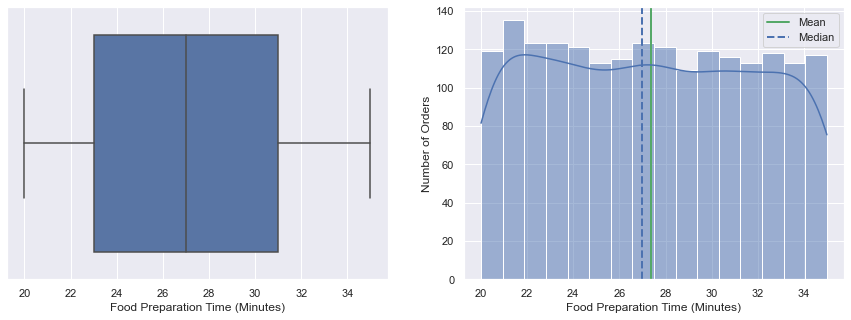

In [31]:
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.subplot(1,2,1);
plt.xlabel("Food Preparation Time (Minutes)");
sns.boxplot(data = df, x =df['food_preparation_time']).set(xlabel="Food Preparation Time (Minutes)");

plt.subplot(1,2,2); 
plt.xlabel("Food Preparation Time (Minutes)");
plt.ylabel("Number of Orders");
plt.axvline(df['food_preparation_time'].mean(), color='g', linewidth=2,label="Mean");
plt.axvline(df['food_preparation_time'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
plt.legend()
sns.histplot(df['food_preparation_time'],bins=16,kde="kde"); # one bin per minute

#### Observations about the Food Preparation Time

- The food preparation time ranges from 20-35 minutes with an average preparation time of 27.4 minutes and a mean of 27 minutes.
- With a skewness of - 0.04 the distribution is approximately symetric.

### 6h: delivery_time

In [32]:
check_it_out_cont(df['delivery_time'])

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64
skewedness -0.23653630513419896
mode : 0    24
dtype: int64



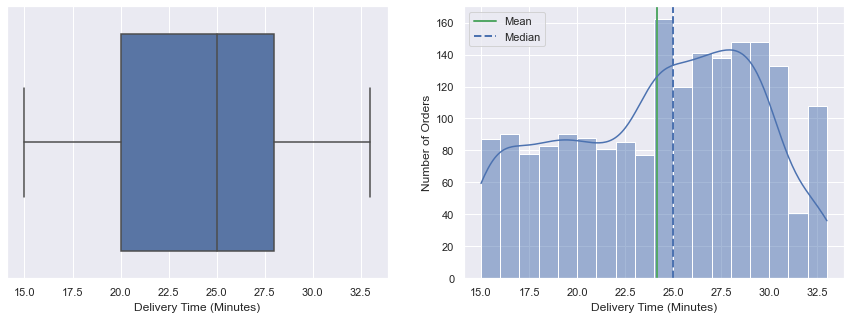

In [33]:
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.subplot(1,2,1);
plt.xlabel("Delivery Time (Minutes)");
sns.boxplot(data = df, x =df['delivery_time']).set(xlabel="Delivery Time (Minutes)");

plt.subplot(1,2,2); 
plt.xlabel("Delivery Time (Minutes)");
plt.ylabel("Number of Orders");
plt.axvline(df['delivery_time'].mean(), color='g', linewidth=2,label="Mean");
plt.axvline(df['delivery_time'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
plt.legend()
sns.histplot(df['delivery_time'],bins=18,kde="kde"); # one bin per minute




### Observations about the Food Preparation Time

- The food preparation time ragnes from 15-33 minutes with an average preparation time of 24.2 minutes and a mean of 25 minutes.
- With a skewness of - 0.2 the distribution is approximately symetric.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants are 
- Shake Shack with 219 orders
- The Meatball Shop with 132 orders
- Blue Ribbon Sushi with 119 orders
- Blue Ribbon Fried Chicken with 96 orders
- Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
over20=df[df['cost_of_the_order']>20]['cost_of_the_order'].count() #orders over $20
allorders=df['cost_of_the_order'].count() #all orders
over20/allorders

0.2924130663856691

#### Observations:
29% of all orders cost over $20. 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [37]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is just over 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [38]:
df['customer_id'].value_counts().head(9)

52832     13
47440     10
83287      9
250494     8
65009      7
259341     7
82041      7
276192     7
115213     6
Name: customer_id, dtype: int64

#### Observations:
The following customers should receive vouchers:
- Customer ID 52832 with 13 orders
- Customer ID 47440 with 10 orders
- Customer ID 83287 with 9 orders
- Customer ID 250494 with 8 orders
- Customer IDs 65009, 259341, 82041, 276192 all placed 7 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### 12a: Compare all numerical values

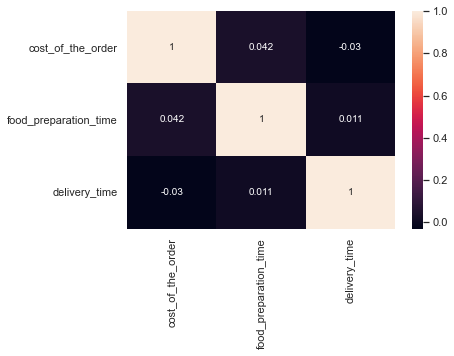

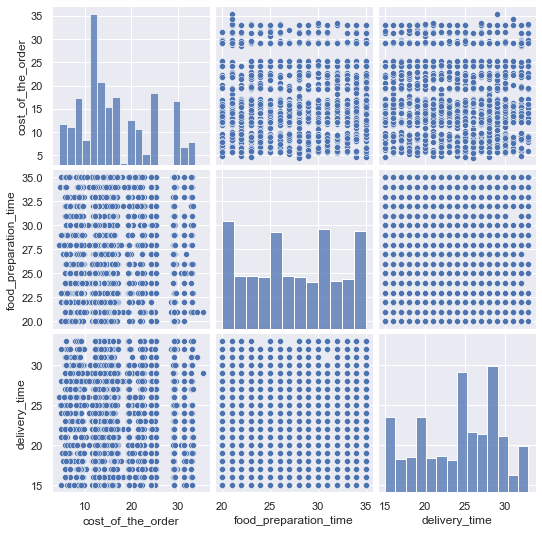

In [39]:
df_compare=df.drop(['order_id', 'customer_id'], axis=1).copy()
sns.heatmap(df_compare.corr(), annot=True);
sns.pairplot(df_compare);

#### Observations:
The Pairplot and the Heatmap show, no noteworthy correlation between the cost of the order, the food preparation time and/or the delivery time.

#### 12b: Comparing Day of the Week to Order Cost, Food Preparation Time and Delivery Time


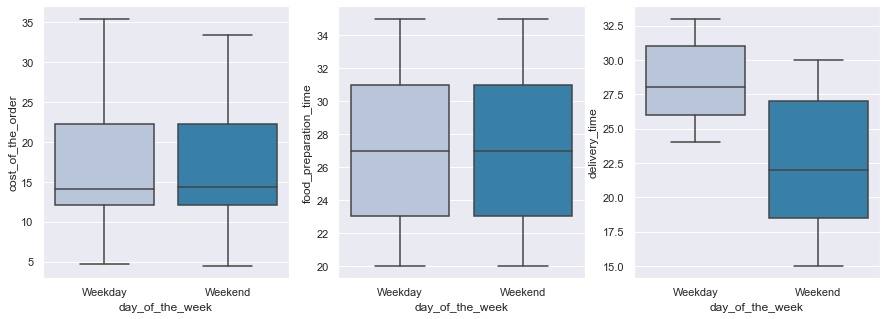

In [40]:
fig = plt.gcf()   #size of plot
fig.set_size_inches(15,5)

plt.subplot(1,3,1); #left plot
sns.boxplot(x = 'day_of_the_week', y = "cost_of_the_order", data = df_compare, palette = 'PuBu');

plt.subplot(1,3,2); #middle plot
sns.boxplot(x = 'day_of_the_week', y = "food_preparation_time", data = df_compare, palette = 'PuBu');

plt.subplot(1,3,3); #right plot
sns.boxplot(x = 'day_of_the_week', y = "delivery_time", data = df_compare, palette = 'PuBu');



#### Observations:
- The cost of the order and the food preparation time don't really differ between weekdays and weekends. 
- Delivery time is much higher during the week.

#### 12b: Comparing Ratings to Order Cost, Food Preparation Time and Delivery Time and Over-all Time

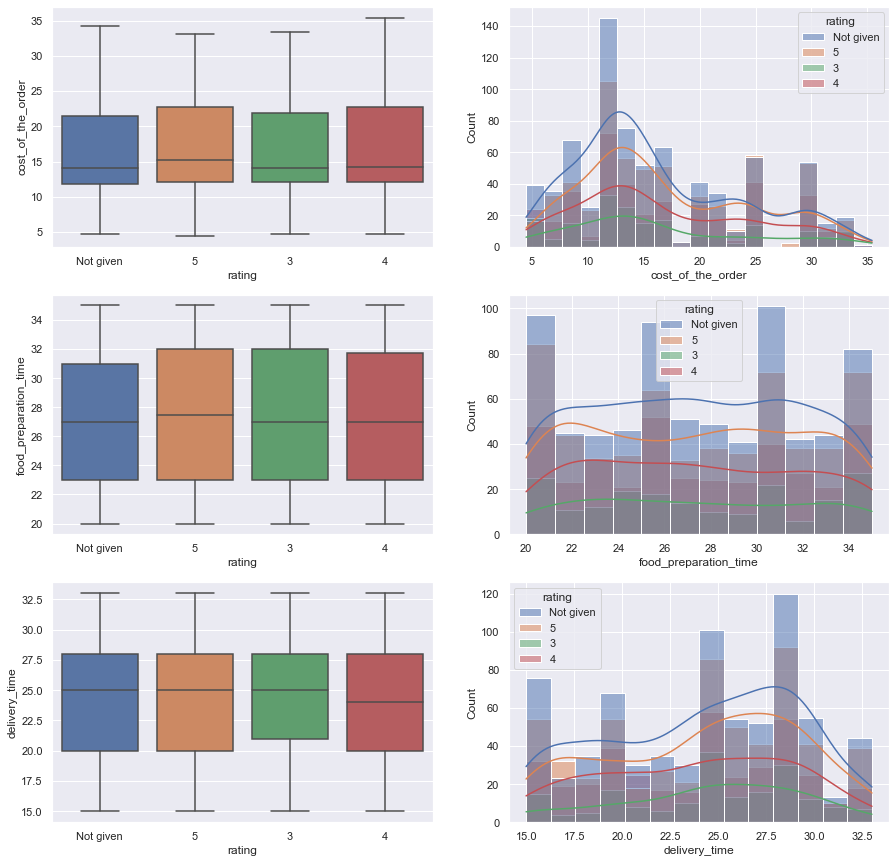

In [41]:
fig = plt.gcf()    #size of plot
fig.set_size_inches(15,15)

plt.subplot(3,2,1); #top left plot
sns.boxplot(x = 'rating', y = "cost_of_the_order", data = df_compare);

plt.subplot(3,2,3);  #middle left plot
sns.boxplot(x = 'rating', y = "food_preparation_time", data = df_compare);

plt.subplot(3,2,5); #bottom left plot
sns.boxplot(x = 'rating', y = "delivery_time", data = df_compare);

plt.subplot(3,2,2); #top right plot
sns.histplot(data=df_compare, x="cost_of_the_order", kde=True, hue="rating");
#sns.barplot(x = 'rating', y = "cost_of_the_order", data = df_compare);

plt.subplot(3,2,4);  #middle right plot
sns.histplot(data=df_compare, x="food_preparation_time", kde=True, hue="rating");
#sns.barplot(x = 'rating', y = "food_preparation_time", data = df_compare);

plt.subplot(3,2,6); #lower right plot
sns.histplot(data=df_compare, x="delivery_time", kde=True, hue="rating");
#sns.barplot(x = 'rating', y = "delivery_time", data = df_compare,hue="day_of_the_week");

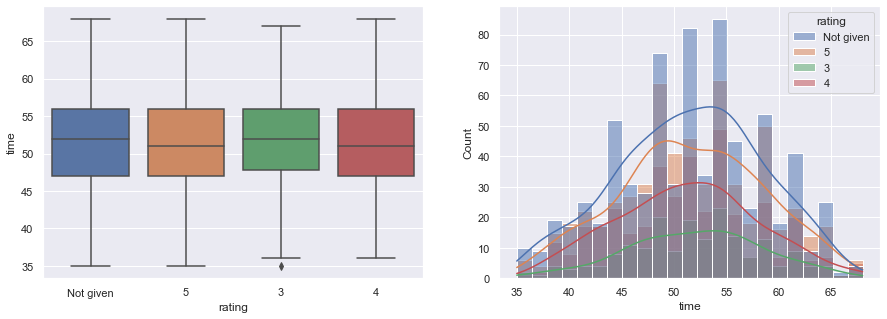

In [42]:
#Comparing Rating vs. over-all time from placing the order to delivery
df_rating_time=df.copy()
df_rating_time['time']=df_rating_time['food_preparation_time']+df_rating_time['delivery_time']

fig = plt.gcf()    #size of plot
fig.set_size_inches(15,5)

plt.subplot(1,2,1); #left plot
sns.boxplot(x = 'rating', y = "time", data = df_rating_time);

plt.subplot(1,2,2); #right plot
sns.histplot(data=df_rating_time, x="time", kde=True, hue="rating");

### Observation

- There are no noteworthy correlations between ratings and cost of order, food preparation time or delivery time. 
- I also looked at rating vs. the over-all time from placing the order until the time of delivery, since it seemed logical to explore that as well, but there wasn't any noteworthy correlation either. 


#### 12c: Comparing Cuisine Type to Restaurants, Ratings, Order Cost, Food Preparation Time and Delivery Time

In [43]:
df.groupby(['cuisine_type'])['restaurant_name'].nunique() #number of restaurants per cuisine

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64

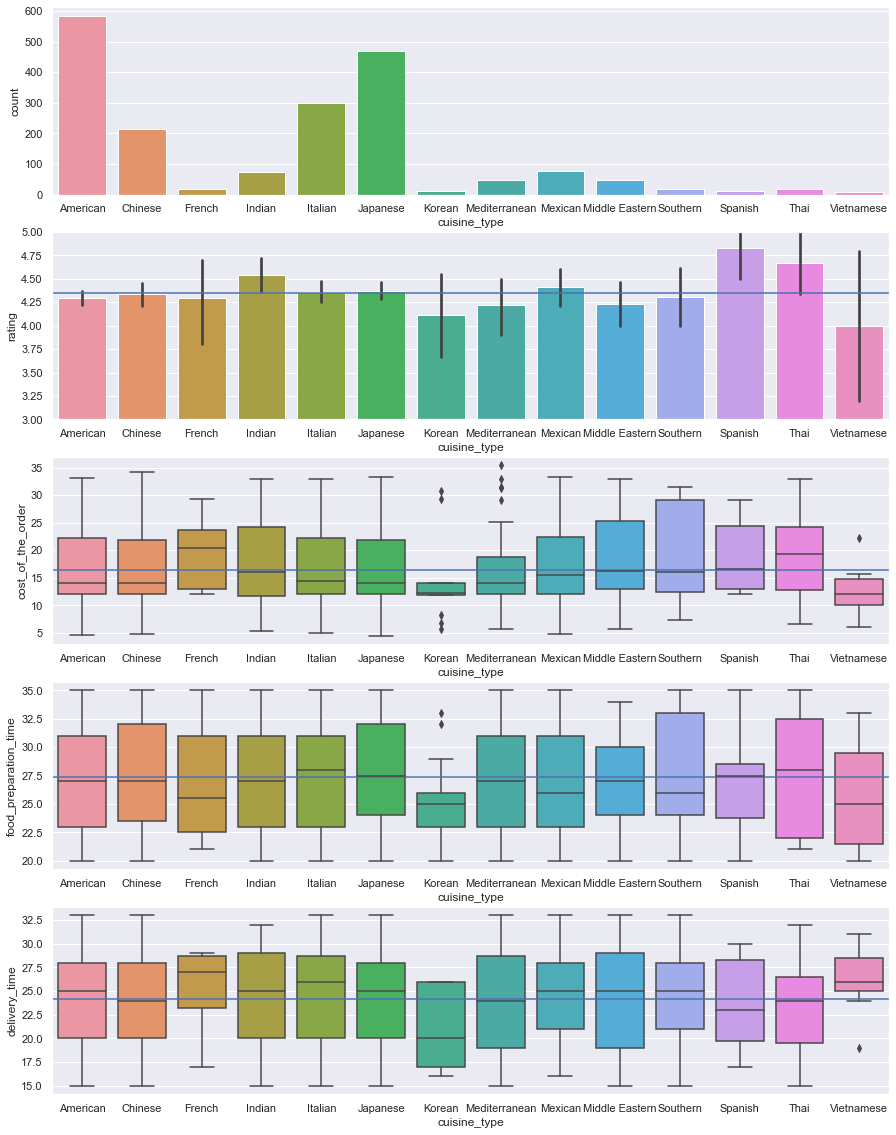

In [44]:
#plotting 5 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,20)

 # 1. Counting all orders
plt.subplot(5,1,1);
sns.countplot(x = 'cuisine_type', data = df_compare);

 # 2. Avarage rating over cuisine types where a rating was given
plt.subplot(5,1,2);
df_add_ratings=df[df['rating']!="Not given"].copy() #removing data where no rating was given
df_add_ratings['rating']=df_add_ratings['rating'].astype(str).astype(int) #changing the ratings to integers
plt.ylim(3,5) # only using ratings range from 3-5
sns.barplot(x = 'cuisine_type', y = "rating", data = df_add_ratings).axhline(df_add_ratings['rating'].mean()); 
#.axhline(df_add_ratings['rating'].mean()) adds horizontal line of the mean over all orders

# 3. Cost of the order over order cost
plt.subplot(5,1,3); 
sns.boxplot(x = 'cuisine_type', y = "cost_of_the_order", data = df_compare).axhline(df_compare['cost_of_the_order'].mean());
#.axhline(....mean()) adds horizontal line of the mean

# 4. Food preparation time over cuisine types
plt.subplot(5,1,4);
sns.boxplot(x = 'cuisine_type', y = "food_preparation_time", data = df_compare).axhline(df_compare['food_preparation_time'].mean());
#.axhline(....mean()) adds horizontal line of the mean

# 5  delivery time over cuisine types
plt.subplot(5,1,5); 
sns.boxplot(x = 'cuisine_type', y = "delivery_time", data = df_compare).axhline(df_compare['delivery_time'].mean());
#.axhline(....mean()) adds horizontal line of the mean

### Observations
- **Cuisine Type vs. Rating (when a rating was given)**
    - The most popular cuisines (American, Japanese and Italian) have approximately an avarage (4.3) avarage rating
    - The Spanish Cuisine has the highest consistent average mean rating, followed by the Indian and the Thai cuisine.
    - The Vietnamese and Korean Cuisine have the lowest average rating.
 
- **Cuisine Type vs. Cost of Order**
    - The French and the Thai Cuisine had the highest avarage order costs. Since it isn't obvious from the order, how many items of food were ordered per order this doesn't say anything about the actual cost of the food.
    - The same can be said for the Korean and Vietnamese kitchen who had the lowest order costs.
- **Cuisine Type vs. Food Preparation Time** 
    - The Spanish Cuisine has the highest consistent above average mean rating, followed by the Indian and the Thai cuisine.
    - The Vietnamese and Korean Cuisine have the lowest average rating. 
    - This is the same as we the Cost of the Order, we don't know for how many people the food was prepared per order.
- **Cuisine Type vs. Delivery Time**
    - The Korean cuisine food had the lowest delivery time, the French cuisine food had the highest delivery time.
    - The mean delivery times of the cuisines with the most restaurants that cater to it (American, Japanese and Italian) are above avarage, so having more restaurants doesn't make a positive impact on the delivery time.
    - The French, Italian and Vietnamese Cuisine Types have the longest delivery times.


#### 12d: Day of the Week to Rating, Order Cost, Food Preparation Time and Delivery Time

Dashed vertical line = Mean / not dashed = Median


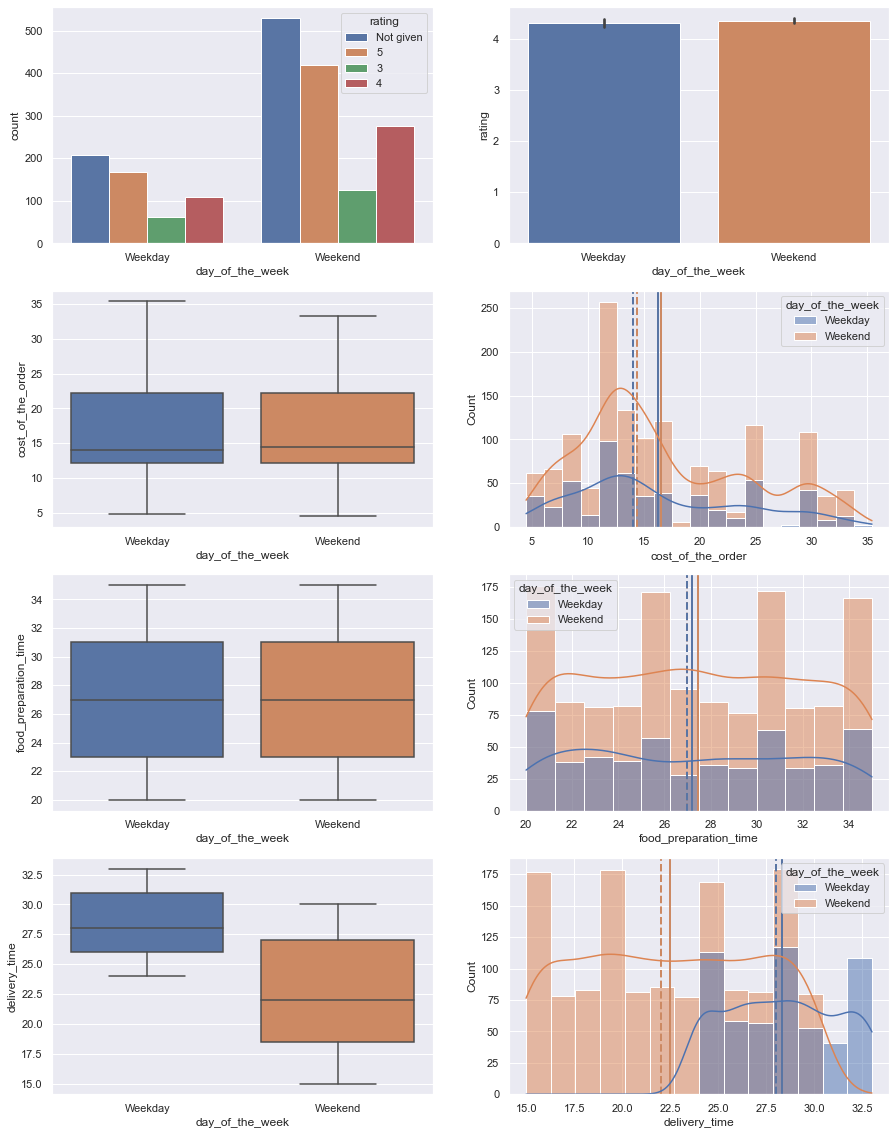

In [45]:
print('Dashed vertical line = Mean / not dashed = Median') #explain lines in plots. Couldn't get it to add second legend
#changing ratings to numbers in df_add_ratings dataframe
df_add_ratings=df[df['rating']!="Not given"].copy() #removing data where no rating was given
df_add_ratings['rating']=df_add_ratings['rating'].astype(str).astype(int) #changing the ratings to integers

#plotting 8 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,20)

 # 1. Counting different ratings vs. weekdays/weekends 
plt.subplot(4,2,1);
sns.countplot(x ='day_of_the_week', data = df_compare,hue='rating');

 # 2. Avarage rating on weekends/weekdays where a rating was given
plt.subplot(4,2,2);
sns.barplot(x = 'day_of_the_week', y = "rating", data = df_add_ratings);

# 3. Cost of the order vs. weekdays/weekends 
plt.subplot(4,2,3); 
sns.boxplot(x = 'day_of_the_week', y = "cost_of_the_order", data = df_compare);

# 4. Cost of the order vs. weekdays/weekends 
plt.subplot(4,2,4); 
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['cost_of_the_order'].mean(), color='#CC8963', linewidth=2,label="Mean Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['cost_of_the_order'].median(), color='#CC8963',linestyle='dashed', linewidth=2,label="Median Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['cost_of_the_order'].mean(), color='#5975A4', linewidth=2,label="Mean Weekday");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['cost_of_the_order'].median(), color='#5975A4',linestyle='dashed', linewidth=2,label="Median Weekday");
sns.histplot(data=df_compare, x="cost_of_the_order", kde=True, hue="day_of_the_week");

# 5. Food preparation time vs. weekdays/weekends 
plt.subplot(4,2,5);
sns.boxplot(x = 'day_of_the_week', y = "food_preparation_time", data = df_compare);

# 6. Food preparation time vs. weekdays/weekends 
plt.subplot(4,2,6);
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['food_preparation_time'].mean(), color='#CC8963', linewidth=2,label="Mean Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['food_preparation_time'].median(), color='#CC8963',linestyle='dashed', linewidth=2,label="Median Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['food_preparation_time'].mean(), color='#5975A4', linewidth=2,label="Mean Weekday");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['food_preparation_time'].median(), color='#5975A4',linestyle='dashed', linewidth=2,label="Median Weekday");
sns.histplot(data=df_compare, x="food_preparation_time", kde=True, hue="day_of_the_week");


# 7. delivery time vs. weekdays/weekends 
plt.subplot(4,2,7); 
sns.boxplot(x = 'day_of_the_week', y = "delivery_time", data = df_compare);

# 1. Counting different ratings weekdays/weekends 
plt.subplot(4,2,8);
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['delivery_time'].mean(), color='#CC8963', linewidth=2,label="Mean Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekend"]['delivery_time'].median(), color='#CC8963',linestyle='dashed', linewidth=2,label="Median Weekend");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['delivery_time'].mean(), color='#5975A4', linewidth=2,label="Mean Weekday");
plt.axvline(df[df["day_of_the_week"]=="Weekday"]['delivery_time'].median(), color='#5975A4',linestyle='dashed', linewidth=2,label="Median Weekday");
sns.histplot(data=df_compare, x="delivery_time", kde=True, hue="day_of_the_week");


### Observations
- **Day of the Week vs. Rating/Cost of the Order/Food Preparation Time**
    - The Day of the Week and Rating/Cost of the Order/Food Preparation Time aren't correlated
- **Day of the Week vs. Delivery Time**
    - The delivery time on weekends is clearly lower than during the week


#### 12e: Sum of Order Costs to Restaurant Name and Cuisine Type

In [46]:
print('Sum of all orders $',df['cost_of_the_order'].sum())
print('Sum of orders per restaurant',df.groupby('restaurant_name')['cost_of_the_order'].sum().nlargest(10))
df.groupby('restaurant_name')['cost_of_the_order'].sum().nlargest(5).sum()/df['cost_of_the_order'].sum()

Sum of all orders $ 31314.82
Sum of orders per restaurant restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


0.33223055409547303

In [47]:
print('Sum of all orders $',df['cost_of_the_order'].sum())
print('Sum of orders per cusine type',df.groupby('cuisine_type')['cost_of_the_order'].sum().nlargest(10))
df.groupby('cuisine_type')['cost_of_the_order'].sum().nlargest(3).sum()/df['cost_of_the_order'].sum()

Sum of all orders $ 31314.82
Sum of orders per cusine type cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Name: cost_of_the_order, dtype: float64


0.7053107761756259

### Observations

- The accumulated cost of all orders is \\$31,314.82
- Sum of Cost of the Order vs. Restaurant: The top 5 restaurants brought in orders for more than \\$1,000 and combined brought in 33% of all order costs.
- Sum of Cost of the Order vs. Cuisine Type: The top 3 cuisine types brought in orders for more than \\$4,800 and combined brought in 71% of all order costs.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
df_promotion=df[df['rating']!="Not given"].copy() #remove all rows without a rating
counting=df_promotion['restaurant_name'].value_counts() #create series with reaturant names and how often they appear in remaining df
df_promotion['rest_count']=counting.loc[df_promotion['restaurant_name']].values # add column to df_promotion with how often restaurant appears
indexNames = df_promotion[df_promotion['rest_count'] <=50].index # orders from restaurants with less than 50 rating counts
df_promotion.drop(indexNames , inplace=True) # get rid of them!
df_promotion['rating']=df_promotion['rating'].astype(str).astype(int) #change all our ratings into integers
df_promotion.groupby('restaurant_name').mean()['rating'].dropna()  #reduce to remaining restaurants


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
All 4 restaurants that have more than 50 ratings have an average rating greater than 4. The restaurants that should receive the promotional offer are:
- Blue Ribbon Fried Chicken 
- Blue Ribbon Sushi  
- Shake Shack 
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [49]:
df_revenue=df.copy()
def cal_revenue(my_row): #function to calculate net revenue for a given cost
    price=my_row['cost_of_the_order']
    net=0
    if price>20: net=price*.25
    elif price>5: net=price*.15
    #print(net)
    return np.around(net,2)

df_revenue['net_revenue'] = df_revenue.apply(cal_revenue,axis=1) #add column with net revenue for each row
np.around(df_revenue['net_revenue'].sum(),2) #add up net revenue column

6166.4

#### Observations: 
The company generated a net revenue of $6,166.40 over the given set of orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [50]:
df_revenue['total_time']=df_revenue['food_preparation_time']+df_revenue['food_preparation_time']
df_revenue[df_revenue['total_time']>60].shape[0]*100/df_revenue.shape[0]

30.400421496311907

#### Observations:
About 30% of all orders take over an hour to be delivered after they are placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [51]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time during the week is 28.3 minutes which is about 6 minutes longer than on the mean delivery time on weekends with 22.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


#### Conclusions:
Considering that according to our data neither Order Cost, Food Preparation Time and Delivery Time and Over-all Time have a noticable impact on the rating it is most likely that the rating is mostly driven by the quality of the food itself.

Delivery Times during the weekend are lower, but since this doesn't have much impact on the rating, the customers seems to anticipate this.

There is no information on for how many people one order was or the actual price of food.

The rating is mostly driven by the individual restaurants and the cuisine type.


#### Recommondations:

Have different promotional offers in the advertisement for the restaurants:
- For restaurants must have a rating count of more than 50 and the average rating should be greater than 4 as mentioned above.
- For restaurants who completed orders for over $1,000 in a given amount of time

Give coupons to customers
- for every 10 orders that they place
- for rating the last 5 orders they have placed

Other:
Indian, Thai and Spanish cuisine types have consistently good ratings, but not many orders were placed. To drive more business in this direction, we could do 'ethnic food' weeks or months. E.g do an Indian week, where Indian restaurants get to advertise for less than usual price. And advertise this in turn to Indian restaurants who don't participate with us yet.



#### Follow-up recommended:
- The ratings given were 3,4 and 5. Usually ratings are from 1-5. Double check that ratings 1&2 weren't removed from our data set before we got it.
- Look into the time of day the order was placed (Breakfast, Lunch, Dinner) 
- Lookk at how many entrees per order to give an approximate estimate of how many people ordered together (individual, family, a whole office).

